# Stock Analysis Capstone Project  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Portfolio of Bank Stocks**

In [3]:
# Bank of America
BAC = pd.read_csv("BAC.csv",parse_dates=True,index_col='Date')

# JP Morgan
JPM = pd.read_csv("JPM.csv",parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')

# HSBC
HSBC = pd.read_csv("HSBC.csv",parse_dates=True,index_col='Date')

#Royal Bank of Canada
RY = pd.read_csv("RY.csv",parse_dates=True,index_col='Date')

#### List and Dictionary for Convenience

In [4]:
portfolio_list = [BAC,JPM,C,HSBC,RY]

In [5]:
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

Returns Analysis

What is the start date and what is the end date for the price history of these stocks?

In [6]:
BAC.index.max()
BAC.index[-1]

Timestamp('2021-09-03 00:00:00')

In [7]:
BAC.index.min()
BAC.index[0]

Timestamp('2016-09-06 00:00:00')

Create a line plot showing the Adj. Close prices over the last 5 years for all the stocks in the portfolio (together on the same plot). Make sure the plot has a legend.

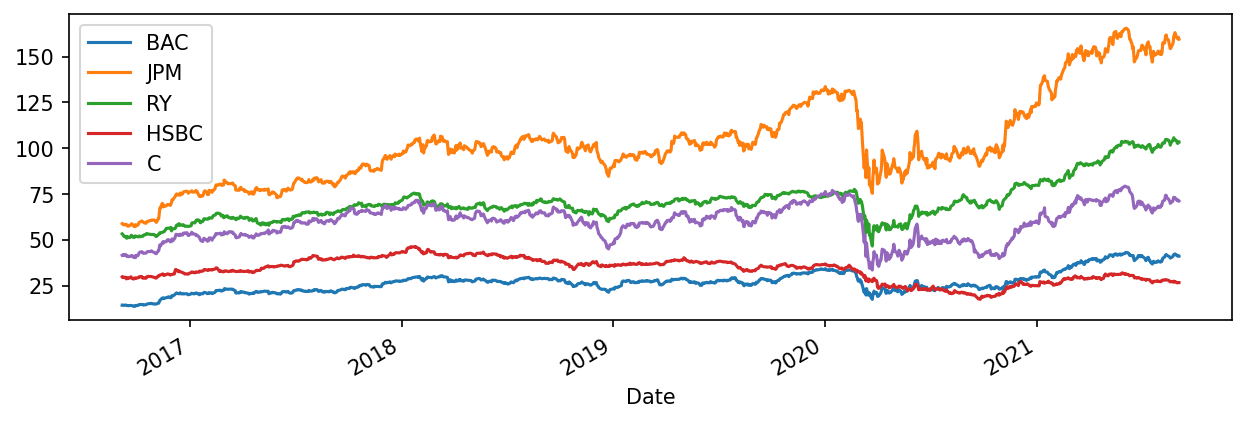

In [8]:
fig,ax=plt.subplots(dpi=150,figsize=(10,3))
BAC['Adj Close'].plot(ax=ax,label='BAC')
JPM['Adj Close'].plot(ax=ax,label='JPM')
RY['Adj Close'].plot(ax=ax,label='RY')
HSBC['Adj Close'].plot(ax=ax,label='HSBC')
C['Adj Close'].plot(ax=ax,label='C')
plt.legend()

Create a function that takes in the Adj. Close price series, and then can calculate the stocks percent rise or decline from any set of given dates. 

In [9]:
def perc_calc(ticker,start_date,end_date):
    if start_date not in ticker['Adj Close'].index:
        return f"START NOT VALID"
    if end_date not in ticker['Adj Close'].index:
        return f"END NOT VALID"
    
    adj_close_start=ticker['Adj Close'][start_date]
    adj_close_end=ticker['Adj Close'][end_date]
    change=100*(adj_close_end-adj_close_start)/adj_close_start
    return f"Percent change: {np.round(change,2)}%"

In [10]:
 perc_calc(BAC,'2016-09-06','2021-09-03')

'Percent change: 187.74%'

In [11]:
perc_calc(BAC,'2016-09-06','2025-09-03')

'END NOT VALID'

Create a histogram of the daily returns for each stock in the portfolio

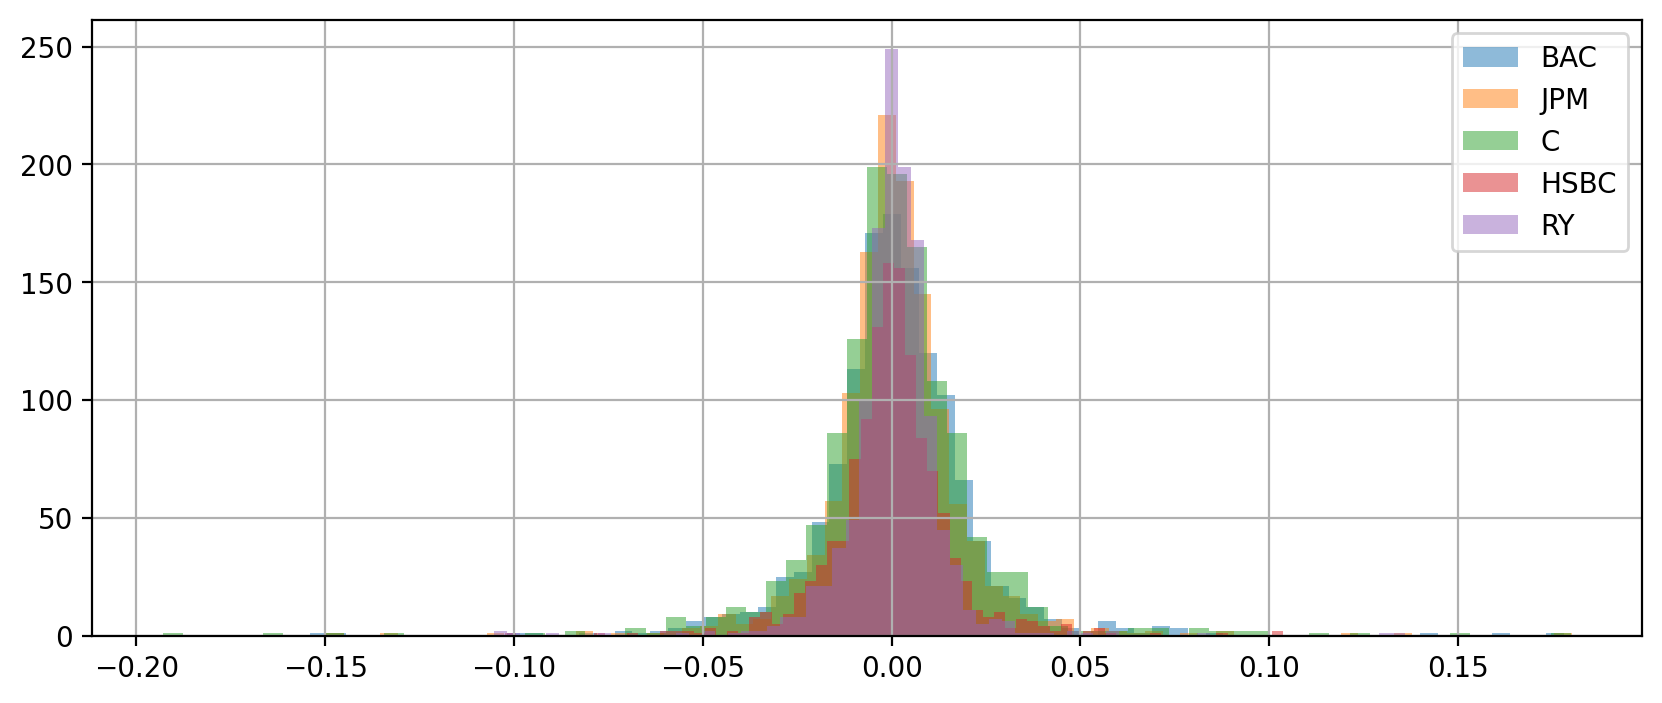

In [12]:
plt.figure(dpi=200,figsize=(10,4))
for stk_name,stk_df in portfolio_dict.items():
    stk_df['Adj Close'].pct_change(1).hist(label=stk_name,alpha=0.5,bins=70)
plt.legend()

If you had invested \\$10,000 in BAC (approximately 701 shares) at the start of the time series, you would have about \\$28773 at the end of the time period. Create a plot that shows the value of \\$10,000 BAC at the start of the time series and what value it would have in dollars throughout the rest of the time period.**

In [43]:
bac_ret=BAC['Adj Close'].pct_change(1).dropna()

In [44]:
cum_ret=(bac_ret+1).cumprod()

<AxesSubplot:xlabel='Date'>

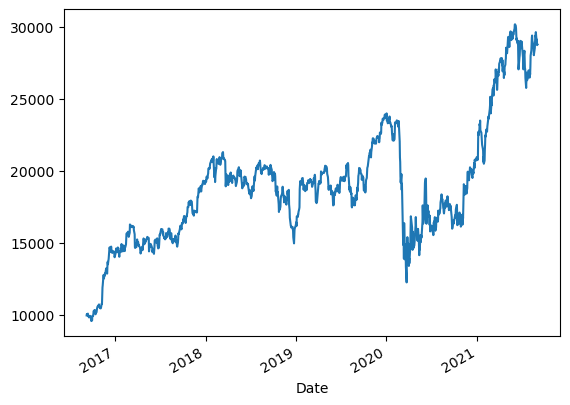

In [45]:
bac_10k=cum_ret*10**4
bac_10k.plot()

Find the Annualized Sharpe Ratios for each stock in the portfolio

In [47]:
def compute_sharpe_ratio(data,risk_free_rate=0):
    mean_return=data['Adj Close'].pct_change(1).mean()
    std=data['Adj Close'].pct_change(1).std()
    sharpe_ratio=(mean_return-risk_free_rate)/std
    return sharpe_ratio*(252**0.5)

In [48]:
for ticker,df in portfolio_dict.items():
    print(f"{ticker} Annualized Sharpe Ratio is: {compute_sharpe_ratio(df)}")

BAC Annualized Sharpe Ratio is: 0.7947267104783096
JPM Annualized Sharpe Ratio is: 0.8165069200136568
C Annualized Sharpe Ratio is: 0.47918276513516356
HSBC Annualized Sharpe Ratio is: 0.03389350547471227
RY Annualized Sharpe Ratio is: 0.7323176596668234


Create a plot showing the daily volume of stock traded over the time period of 5 years

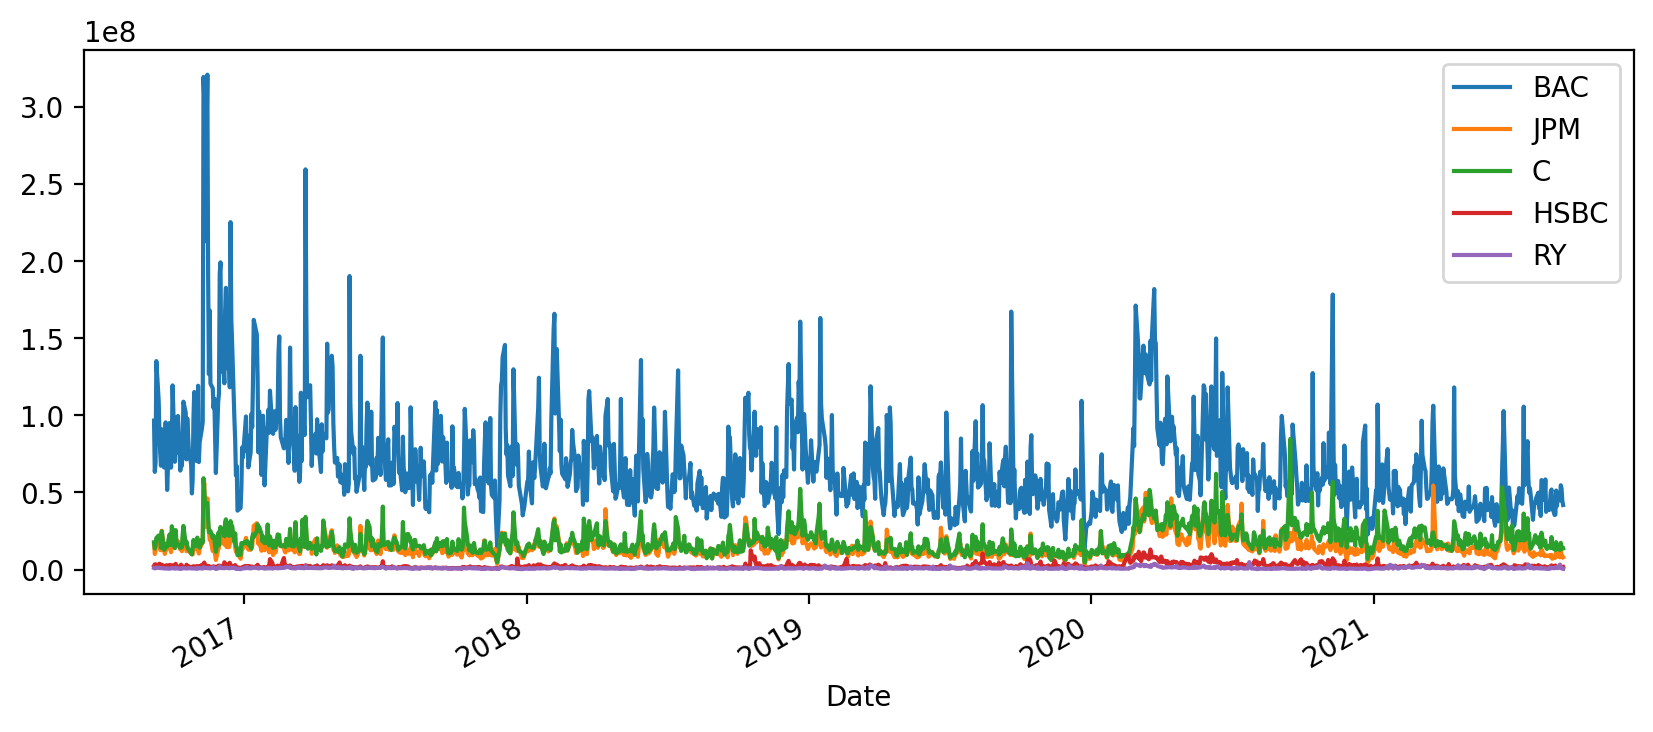

In [18]:
plt.figure(dpi=200,figsize=(10,4))
for stk_name,stk_df in portfolio_dict.items():
    stk_df['Volume'].plot(label=stk_name)
plt.legend()

Now create a similar plot as the previous one, but it should reflect the total dollar amount, meaning you will need to take into account the price on each day the volume was traded. Feel free to use Adj Close price as the consensus price for a given day

In [30]:
C['TOTAL DOLLAR AMOUNT']=C['Adj Close']*C['Volume']

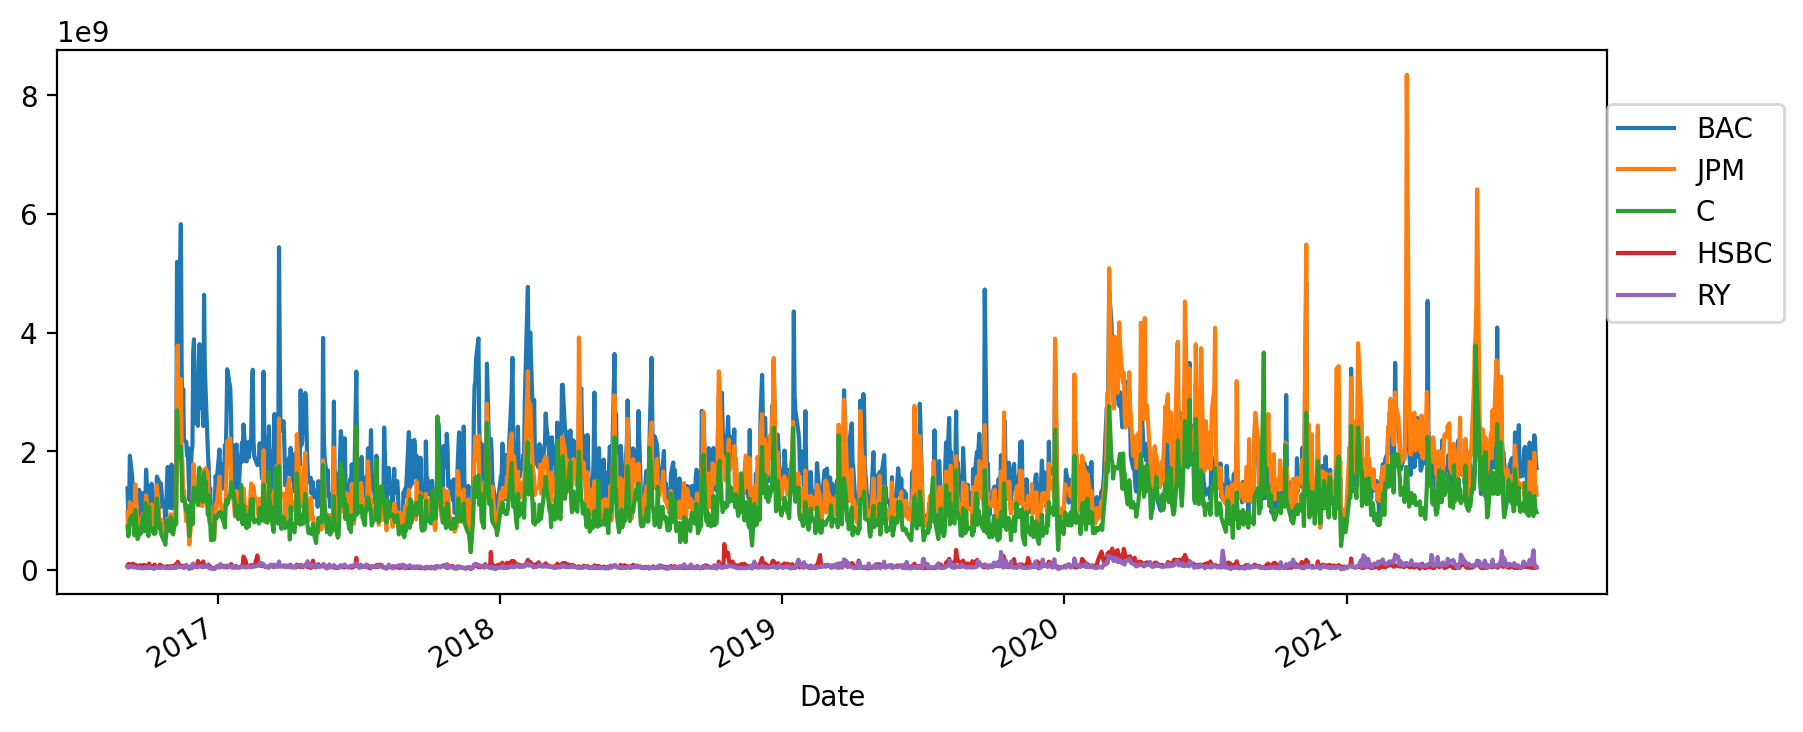

In [31]:
 plt.figure(dpi=200,figsize=(10,4))
for stk_name,stk_df in portfolio_dict.items():
    (stk_df['Volume']*stk_df['Adj Close']).plot(label=stk_name)
plt.legend(loc=(1,0.5))

Based on your plot above, which stock had the highest dollar value amount traded of their stock on a single day and what date was this? Did anything significant happen around this time period for that company?

In [33]:
JPM['TOTAL DOLLAR AMOUNT']=JPM['Adj Close']*JPM['Volume']

In [34]:
 JPM['TOTAL DOLLAR AMOUNT'].max()

8345011203.784801

In [35]:
JPM['TOTAL DOLLAR AMOUNT'].idxmax()

Timestamp('2021-03-19 00:00:00')

Technical Analysis

Using only BAC stock, create a plot showing the Adj. Close Price along with the 60 day moving average of the price on the same plot.

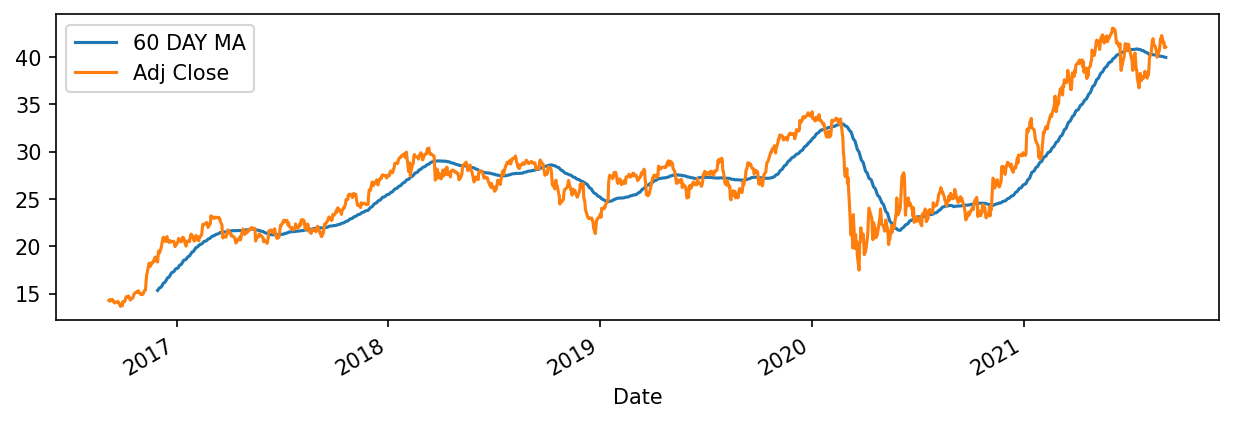

In [38]:
plt.figure(figsize=(10,3),dpi=150)
BAC['Adj Close'].rolling(window=60).mean().plot(label='60 DAY MA')
BAC['Adj Close'].plot(label='Adj Close')
plt.legend()

Create a plot which has the Adj. Close price and the upper and lower bollinger bands. Use the formula above, with N=20 days for the rolling rate of the moving average and K=2 for the multiplication of the standard deviation

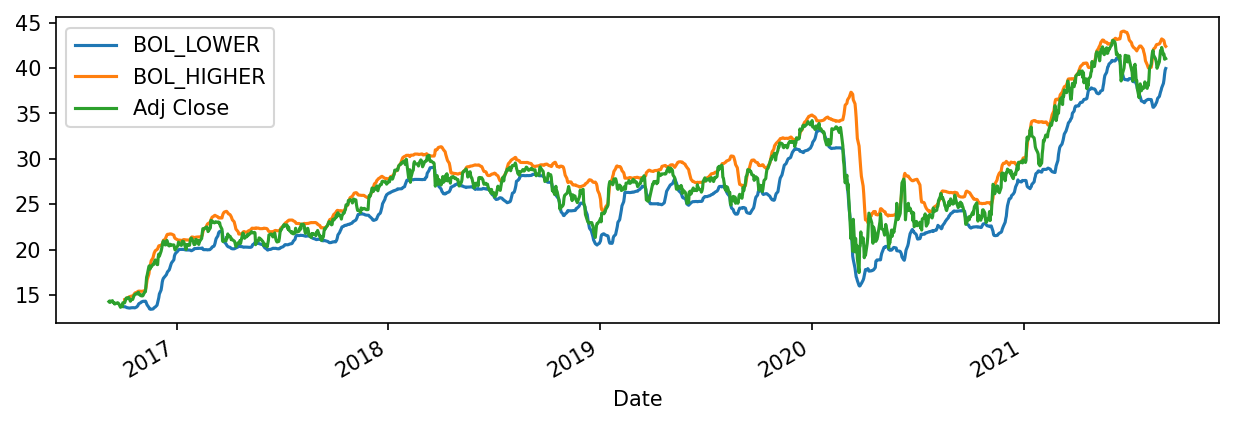

In [46]:
BAC['MA']=BAC['Adj Close'].rolling(20).mean()
BAC['SD']=BAC['Adj Close'].rolling(20).std()
plt.figure(figsize=(10,3),dpi=150)
BAC['BOL_L']=(BAC['MA']-2*BAC['SD']).plot(label='BOL_LOWER')
BAC['BOL_H']=(BAC['MA']+2*BAC['SD']).plot(label='BOL_HIGHER')
BAC['Adj Close'].plot(label='Adj Close')
plt.legend()

-----